<a href="https://colab.research.google.com/github/afiflh/Machine_Learning/blob/main/Kuis%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 1: Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

Nama: Afif Lukmanul Hakim

Kelas: TI-3G/02

NIM: 2141720262

In [1]:
# Menginstal beberapa paket Python yang umum digunakan.
%pip install torch torchvision numpy matplotlib pandas

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Download MNIST dataset menggunakan torchvision
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 88169501.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 87525790.34it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 21779042.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8222066.80it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Ekstrak data dan label
data_mnist = mnist_dataset.data
label = mnist_dataset.targets

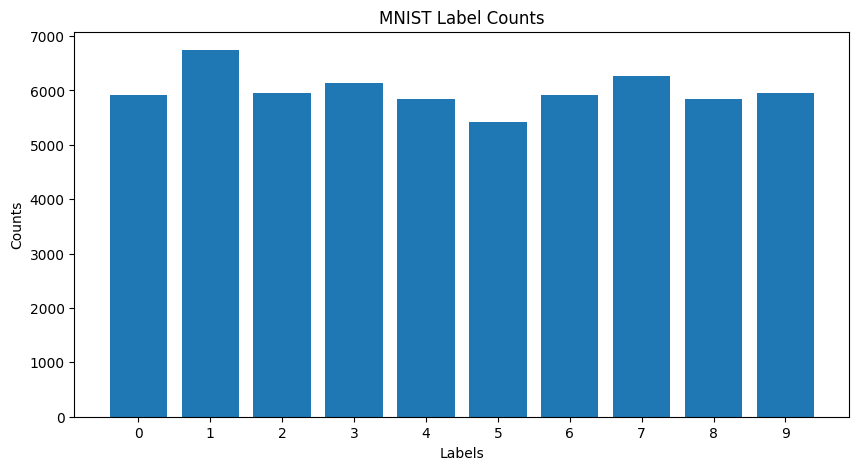

In [4]:
#1 Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan?
labelcounts = torch.bincount(label)

#Tampilkan data
plt.figure(figsize=(10, 5))
plt.bar(range(10), labelcounts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('MNIST Label Counts')
plt.show()

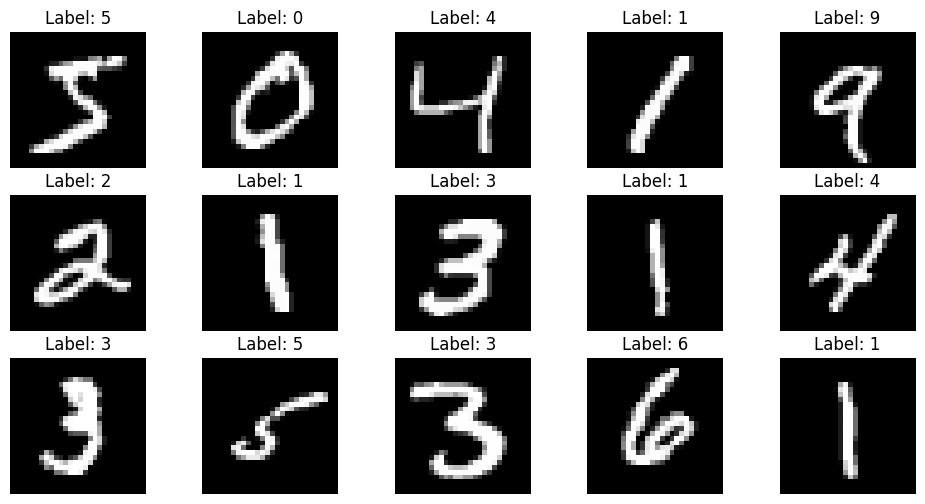

In [5]:
#2 Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.
plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data_mnist[i], cmap='gray')
    plt.title(f"Label: {label[i].item()}")
    plt.axis('off')

plt.show()

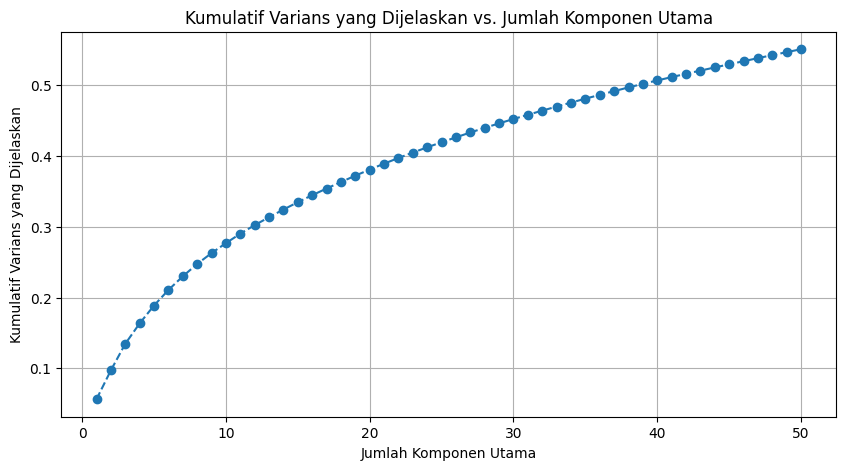

In [6]:
#3 Lakukan proses ekstraksi fitur pada data MNIST

#Menganalisis dan preprocessing data.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Mengubah bentuk (reshape) array data.
data = data_mnist.reshape(data_mnist.shape[0], -1)

#Standarisasi data (rata-rata=0, varians=1)
scaler_data = StandardScaler()
datastd = scaler_data.fit_transform(data)

#Melakukan PCA dengan jumlah komponen yang diinginkan
n_components = 50
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(datastd)

#Menampilkan rasio varians yang dijelaskan
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.title('Kumulatif Varians yang Dijelaskan vs. Jumlah Komponen Utama')
plt.grid()
plt.show()

In [7]:
#4  Buat data training dan data testing menggunakan rasio 70:30, 80:20, 90:10

from sklearn.model_selection import train_test_split

# Daftar Ukuran Data Uji
test_sizes = [0.3, 0.2, 0.1]

# Inisialisasi daftar kosong untuk menyimpan pembagian data
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# Pembagian data latih-uji untuk setiap ukuran data uji
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(pca_data, label, test_size=test_size)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Verifikasi bentuk (shapes) dari himpunan data latih dan uji untuk setiap pembagian (split)
for i, test_size in enumerate(test_sizes):
    print(f"Split {i + 1}:")
    print(f"X_train shape: {X_train_list[i].shape}")
    print(f"y_train shape: {y_train_list[i].shape}")
    print(f"X_test shape: {X_test_list[i].shape}")
    print(f"y_test shape: {y_test_list[i].shape}")
    print()

Split 1:
X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])

Split 2:
X_train shape: (48000, 50)
y_train shape: torch.Size([48000])
X_test shape: (12000, 50)
y_test shape: torch.Size([12000])

Split 3:
X_train shape: (54000, 50)
y_train shape: torch.Size([54000])
X_test shape: (6000, 50)
y_test shape: torch.Size([6000])



In [8]:
#5, 6, 7 Klasifikasi menggunakan RBF Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_kernel = SVC(kernel='rbf')

# Melatih model SVM pada data uji
rbf_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = rbf_kernel.predict(X_test)

# Evaluasi model
akurasi = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matrix Konfusi:\n', confusion_mtx)

Akurasi: 97.05%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.98      0.99      0.99       676
           2       0.97      0.98      0.98       641
           3       0.97      0.96      0.96       649
           4       0.97      0.98      0.97       598
           5       0.97      0.96      0.97       553
           6       0.98      0.98      0.98       614
           7       0.95      0.96      0.96       555
           8       0.97      0.97      0.97       584
           9       0.96      0.94      0.95       581

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matrix Konfusi:
 [[544   0   2   0   0   0   2   0   1   0]
 [  0 670   3   1   0   0   0   0   2   0]
 [  3   0 628   3   0   1   0   3   2   1]
 [  1   2   4 620   0   8   0   6   7   1]
 [  2   0   2 

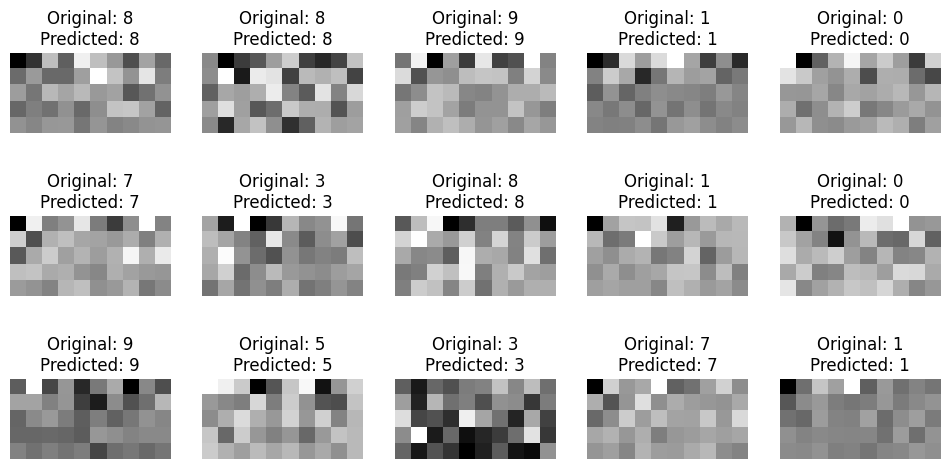

In [9]:
# Menampilkan citra data testing berserta hasil pelabelannya

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [10]:
#5, 6, 7 Klasifikasi menggunakan Polynomial Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

polynomial_kernel = SVC(kernel='poly', degree=3)

# Melatih model SVM pada data uji
polynomial_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = polynomial_kernel.predict(X_test)

#Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 96.60%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.98      0.99      0.99       676
           2       0.97      0.97      0.97       641
           3       0.97      0.94      0.95       649
           4       0.96      0.98      0.97       598
           5       0.96      0.97      0.96       553
           6       0.99      0.98      0.98       614
           7       0.97      0.95      0.96       555
           8       0.94      0.97      0.96       584
           9       0.95      0.93      0.94       581

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matriks Konfusi:
 [[541   0   1   0   1   1   1   0   3   1]
 [  0 669   4   1   0   0   0   0   2   0]
 [  3   0 622   4   1   1   1   2   6   1]
 [  1   2   5 609   0  12   0   5  14   1]
 [  2   0   2

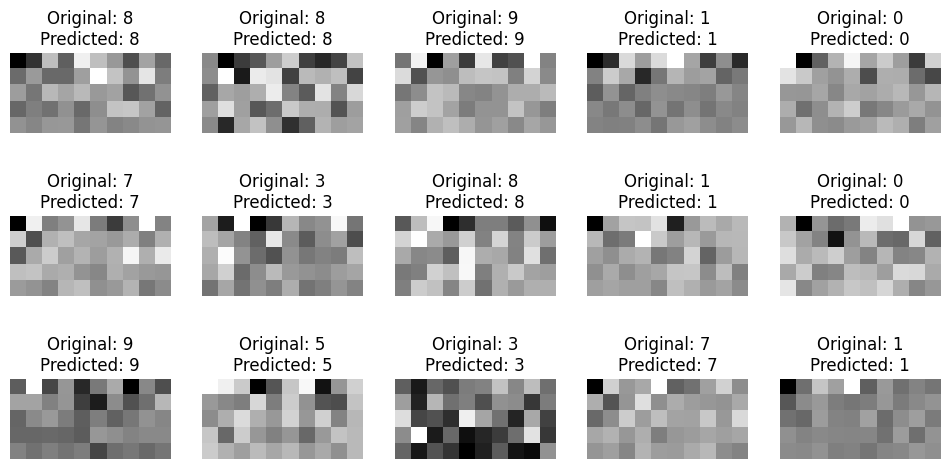

In [11]:
# Menampilkan citra data testing berserta hasil pelabelannya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [13]:
#5, 6, 7 Klasifikasi menggunakan Sigmoid Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sigmoid_kernel = SVC(kernel='sigmoid', degree=3)

# Melatih model SVM pada data uji
sigmoid_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = sigmoid_kernel.predict(X_test)

# Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 78.25%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       549
           1       0.87      0.96      0.91       676
           2       0.77      0.75      0.76       641
           3       0.79      0.77      0.78       649
           4       0.82      0.80      0.81       598
           5       0.69      0.68      0.68       553
           6       0.86      0.81      0.83       614
           7       0.70      0.82      0.76       555
           8       0.83      0.70      0.76       584
           9       0.71      0.69      0.70       581

    accuracy                           0.78      6000
   macro avg       0.78      0.78      0.78      6000
weighted avg       0.78      0.78      0.78      6000

Matriks Konfusi:
 [[458   0  12   4   3  46   7   5  10   4]
 [  0 647  13   4   0   3   0   2   6   1]
 [ 18  16 481  22   7  15  42  14  13  13]
 [ 16   8  21 497   6  36   6  33  16  10]
 [  6   1  14

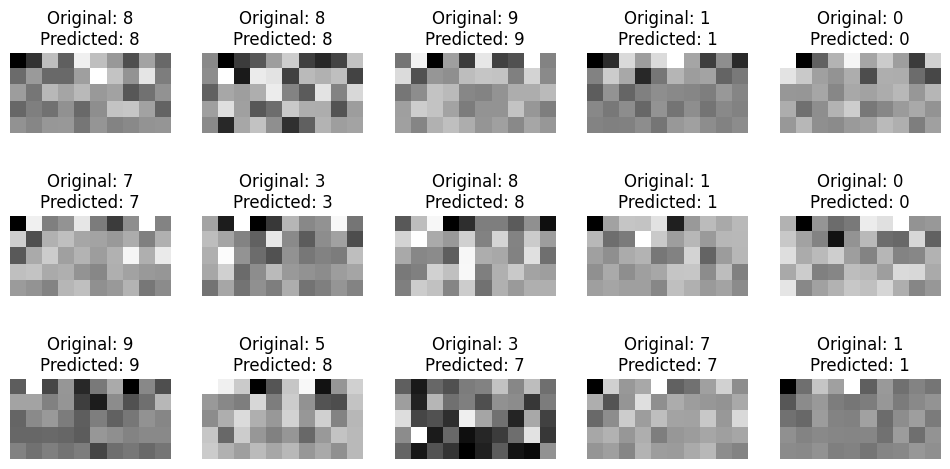

In [14]:
# Menampilkan citra data testing
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [15]:
#5, 6, 7 Klasifikasi menggunakan Linear Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_kernel = SVC(kernel='linear')

# Melatih model SVM pada data uji
linear_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = linear_kernel.predict(X_test)

#Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 92.90%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       549
           1       0.94      0.98      0.96       676
           2       0.92      0.93      0.92       641
           3       0.91      0.90      0.90       649
           4       0.93      0.94      0.94       598
           5       0.89      0.88      0.89       553
           6       0.96      0.95      0.96       614
           7       0.93      0.94      0.93       555
           8       0.92      0.89      0.91       584
           9       0.94      0.89      0.91       581

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

Matriks Konfusi:
 [[534   0   1   2   2   5   3   1   1   0]
 [  0 665   2   1   0   3   1   0   4   0]
 [  5   4 597   9   7   1   4   2   9   3]
 [  3   4  12 582   0  27   0   7  13   1]
 [  2   0   9

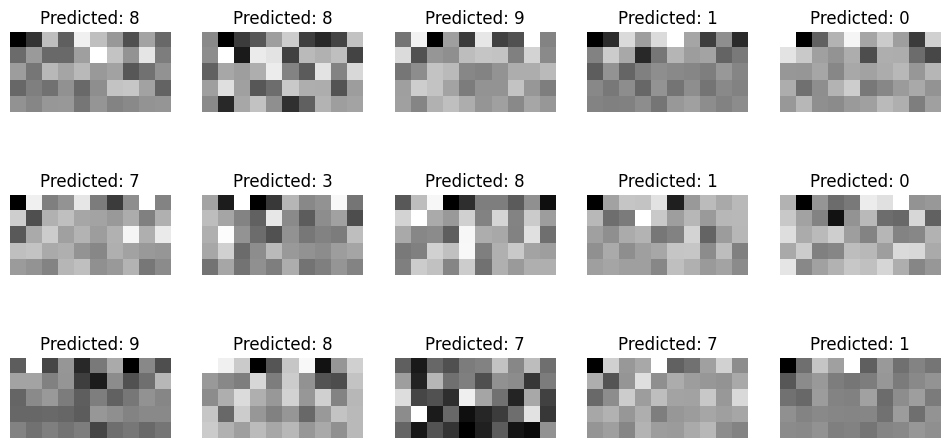

In [16]:
# Menampilkan citra dari data testing
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

- aku